In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [23]:
#getting data

In [24]:
merged_pollutant_dataset_with_neighbors = pd.read_csv("merged_pollutant_dataset_with_neighbors.csv", index_col = 'date', parse_dates = ['date'])

In [25]:
merged_pollutant_dataset_with_neighbors

,state_code,county_code,state_name,county_name,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,73,Alabama,Jefferson,0.5,NaN,0.027,10.0,NaN,7.4,...,NaN,1.8,28.645833,38.00,NaN,NaN,84.270833,98.000000,5.612500,7.950000
2010-01-01,4,13,Arizona,Maricopa,3.1,48.0,0.041,87.0,21.6,NaN,...,43.6,2.0,53.695833,67.20,982.69375,986.55,46.527778,65.111111,3.512963,5.988889
2010-01-01,4,19,Arizona,Pima,0.8,37.0,0.046,44.0,6.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,5,119,Arkansas,Pulaski,1.1,30.0,0.032,NaN,17.6,9.6,...,NaN,NaN,38.927083,50.75,NaN,NaN,25.125000,29.000000,3.411667,6.660000
2010-01-01,6,1,California,Alameda,0.7,32.0,0.021,NaN,22.1,NaN,...,NaN,NaN,53.666667,55.00,NaN,NaN,92.583333,100.000000,4.083333,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-17,49,49,Utah,Utah,0.2,30.0,0.053,15.0,13.6,NaN,...,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,50,7,Vermont,Chittenden,0.3,11.4,0.037,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-17,50,21,Vermont,Rutland,0.3,18.9,NaN,NaN,NaN,NaN,...,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merged_pollutant_dataset_with_neighbors_sorted_pairs = merged_pollutant_dataset_with_neighbors.sort_values(by = ["state_code", \
                                                                                                                "county_code"])
# df.sort_values(by=['col1', 'col2'])

In [27]:
merged_pollutant_dataset_with_neighbors_sorted_pairs

,state_code,county_code,state_name,county_name,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,73,Alabama,Jefferson,0.5,NaN,0.027,10.0,NaN,7.4,...,NaN,1.8,28.645833,38.0,NaN,NaN,84.270833,98.0,5.612500,7.95
2010-01-02,1,73,Alabama,Jefferson,0.5,NaN,0.026,11.0,NaN,7.1,...,NaN,3.8,15.479167,20.0,NaN,NaN,71.041667,86.0,5.550000,8.35
2010-01-03,1,73,Alabama,Jefferson,0.5,NaN,0.022,8.0,NaN,8.1,...,NaN,5.3,11.937500,18.5,NaN,NaN,67.458333,83.0,4.395834,7.10
2010-01-04,1,73,Alabama,Jefferson,0.7,NaN,0.018,18.0,NaN,9.2,...,NaN,5.1,13.395834,17.5,NaN,NaN,77.166666,88.0,3.537500,7.00
2010-01-05,1,73,Alabama,Jefferson,0.7,NaN,0.011,35.0,NaN,9.4,...,NaN,8.7,14.458334,21.0,NaN,NaN,76.625000,86.5,3.041666,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,55,27,Wisconsin,Dodge,0.2,NaN,0.031,NaN,NaN,NaN,...,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
Alabama_Jefferson_df = merged_pollutant_dataset_with_neighbors_sorted_pairs.iloc[:4155,:]

In [29]:
Alabama_Jefferson_df

,state_code,county_code,state_name,county_name,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1,73,Alabama,Jefferson,0.5,NaN,0.027,10.0,NaN,7.4,...,NaN,1.8,28.645833,38.0,NaN,NaN,84.270833,98.0,5.612500,7.95
2010-01-02,1,73,Alabama,Jefferson,0.5,NaN,0.026,11.0,NaN,7.1,...,NaN,3.8,15.479167,20.0,NaN,NaN,71.041667,86.0,5.550000,8.35
2010-01-03,1,73,Alabama,Jefferson,0.5,NaN,0.022,8.0,NaN,8.1,...,NaN,5.3,11.937500,18.5,NaN,NaN,67.458333,83.0,4.395834,7.10
2010-01-04,1,73,Alabama,Jefferson,0.7,NaN,0.018,18.0,NaN,9.2,...,NaN,5.1,13.395834,17.5,NaN,NaN,77.166666,88.0,3.537500,7.00
2010-01-05,1,73,Alabama,Jefferson,0.7,NaN,0.011,35.0,NaN,9.4,...,NaN,8.7,14.458334,21.0,NaN,NaN,76.625000,86.5,3.041666,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,1,73,Alabama,Jefferson,0.2,NaN,0.027,19.0,NaN,13.5,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14,1,73,Alabama,Jefferson,0.2,NaN,0.027,19.0,NaN,13.5,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-15,1,73,Alabama,Jefferson,0.2,NaN,0.027,19.0,NaN,13.5,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
Alabama_Jefferson_df.describe()

,state_code,county_code,co_polutant_level,no2_polutant_level,o3_polutant_level,pm10_polutant_level,pm25frm_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_temp,...,neighbor5_pm25nfrm_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_pressure,neighbor5_max_pressure,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
count,4155.0,4155.0,4155.000000,0.0,4155.000000,4155.000000,0.0,4155.000000,4155.000000,3339.000000,...,0.0,4155.000000,4077.000000,4077.000000,0.0,0.0,4077.000000,4077.000000,4077.000000,4077.000000
mean,1.0,73.0,0.666474,NaN,0.041510,26.896992,NaN,12.790999,8.486558,54.258861,...,NaN,0.730999,56.224525,64.697694,NaN,NaN,74.832774,90.674883,2.857538,6.135013
std,0.0,0.0,0.337012,NaN,0.014513,15.001331,NaN,5.689420,10.518374,24.144272,...,NaN,1.230021,15.324870,15.602401,NaN,NaN,13.321144,9.103150,1.375207,2.332807
min,1.0,73.0,0.100000,NaN,0.000000,2.000000,NaN,1.800000,0.000000,-4.662500,...,NaN,-0.100000,3.708334,8.500000,NaN,NaN,32.250000,40.000000,0.575000,1.400000
25%,1.0,73.0,0.400000,NaN,0.030000,17.000000,NaN,8.850000,2.300000,36.721875,...,NaN,0.200000,44.979167,54.000000,NaN,NaN,65.979167,85.500000,1.847916,4.350000
50%,1.0,73.0,0.600000,NaN,0.041000,24.000000,NaN,11.800000,4.600000,59.620834,...,NaN,0.300000,59.125000,67.500000,NaN,NaN,76.041666,93.500000,2.456250,5.650000
75%,1.0,73.0,0.800000,NaN,0.051000,33.000000,NaN,15.300000,10.600000,75.818750,...,NaN,0.800000,69.604166,78.000000,NaN,NaN,84.854167,98.000000,3.518750,7.450000
max,1.0,73.0,5.700000,NaN,0.098000,180.000000,NaN,58.600000,110.100000,88.397917,...,NaN,27.300000,81.625000,93.500000,NaN,NaN,100.000000,100.000000,9.925000,17.300000


In [31]:
Alabama_Jefferson_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4155 entries, 2010-01-01 to 2021-05-17
Columns: 119 entries, state_code to neighbor5_max_windspeed
dtypes: float64(90), int64(12), object(17)
memory usage: 3.8+ MB


In [32]:

# dropping columns ones with all null values

Alabama_Jefferson_df_reduced = Alabama_Jefferson_df.dropna(axis=1, how='all')
Alabama_Jefferson_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4155 entries, 2010-01-01 to 2021-05-17
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   state_code                         4155 non-null   int64  
 1   county_code                        4155 non-null   int64  
 2   state_name                         4155 non-null   object 
 3   county_name                        4155 non-null   object 
 4   co_polutant_level                  4155 non-null   float64
 5   o3_polutant_level                  4155 non-null   float64
 6   pm10_polutant_level                4155 non-null   float64
 7   pm25nfrm_polutant_level            4155 non-null   float64
 8   so2_polutant_level                 4155 non-null   float64
 9   average_temp                       3339 non-null   float64
 10  max_temp                           3339 non-null   float64
 11  average_pressure                   326

In [33]:
# dropping columns with all same/equal values

nunique = Alabama_Jefferson_df_reduced.nunique()
cols_to_drop = nunique[nunique == 1].index
Alabama_Jefferson_df_reduced = Alabama_Jefferson_df_reduced.drop(cols_to_drop, axis=1)

Alabama_Jefferson_df_reduced.info()
# cols_to_drop

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4155 entries, 2010-01-01 to 2021-05-17
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   co_polutant_level                  4155 non-null   float64
 1   o3_polutant_level                  4155 non-null   float64
 2   pm10_polutant_level                4155 non-null   float64
 3   pm25nfrm_polutant_level            4155 non-null   float64
 4   so2_polutant_level                 4155 non-null   float64
 5   average_temp                       3339 non-null   float64
 6   max_temp                           3339 non-null   float64
 7   average_pressure                   3261 non-null   float64
 8   max_pressure                       3261 non-null   float64
 9   average_rh                         3338 non-null   float64
 10  max_rh                             3338 non-null   float64
 11  average_windspeed                  326

In [34]:
# dropping columns with date types

data_types = Alabama_Jefferson_df_reduced.dtypes
cols_to_drop = data_types[data_types == "object"].index
# nunique = Alabama_Jefferson_df_reduced.nunique()

Alabama_Jefferson_df_reduced = Alabama_Jefferson_df_reduced.drop(cols_to_drop, axis=1)
Alabama_Jefferson_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4155 entries, 2010-01-01 to 2021-05-17
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   co_polutant_level                  4155 non-null   float64
 1   o3_polutant_level                  4155 non-null   float64
 2   pm10_polutant_level                4155 non-null   float64
 3   pm25nfrm_polutant_level            4155 non-null   float64
 4   so2_polutant_level                 4155 non-null   float64
 5   average_temp                       3339 non-null   float64
 6   max_temp                           3339 non-null   float64
 7   average_pressure                   3261 non-null   float64
 8   max_pressure                       3261 non-null   float64
 9   average_rh                         3338 non-null   float64
 10  max_rh                             3338 non-null   float64
 11  average_windspeed                  326

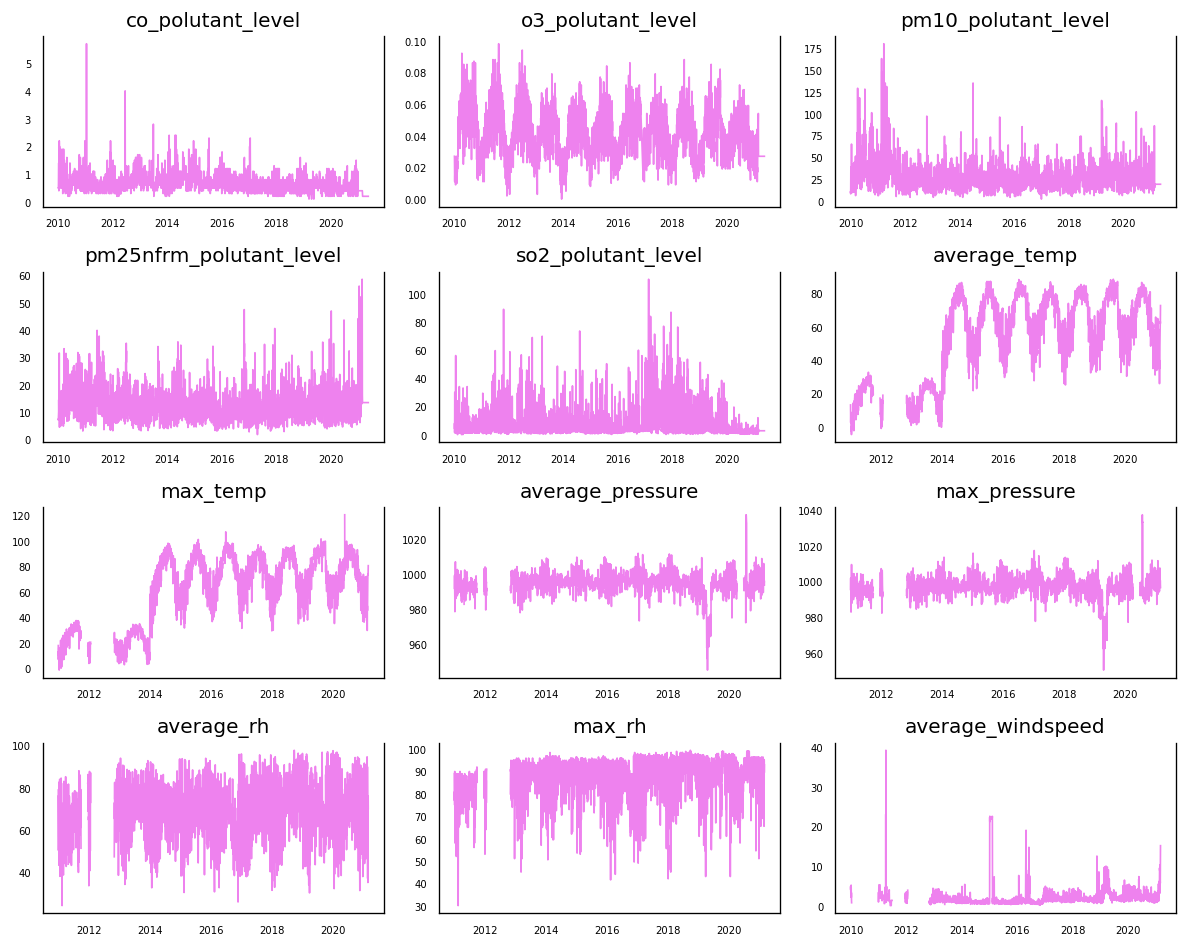

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=3, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    data = Alabama_Jefferson_df_reduced[Alabama_Jefferson_df_reduced.columns[i]]
    ax.plot(data, color="violet", linewidth=1)
    # Decorations
    ax.set_title(Alabama_Jefferson_df_reduced.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [36]:
# Interpolation for missing values

Alabama_Jefferson_df_interpolated = Alabama_Jefferson_df_reduced.interpolate(method='time')

In [37]:
Alabama_Jefferson_df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4155 entries, 2010-01-01 to 2021-05-17
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   co_polutant_level                  4155 non-null   float64
 1   o3_polutant_level                  4155 non-null   float64
 2   pm10_polutant_level                4155 non-null   float64
 3   pm25nfrm_polutant_level            4155 non-null   float64
 4   so2_polutant_level                 4155 non-null   float64
 5   average_temp                       3790 non-null   float64
 6   max_temp                           3790 non-null   float64
 7   average_pressure                   3790 non-null   float64
 8   max_pressure                       3790 non-null   float64
 9   average_rh                         3790 non-null   float64
 10  max_rh                             3790 non-null   float64
 11  average_windspeed                  415

In [38]:
# Selecting columns with all non-null values after interpolation 

AJ_df = Alabama_Jefferson_df_interpolated.dropna(axis=1, how='any')
AJ_df


,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.5,0.027,10.0,7.4,2.0,4.287500,6.8,0.2,8.4,18.0,...,0.034,0.2,0.035,1.8,28.645833,38.0,84.270833,98.0,5.612500,7.95
2010-01-02,0.5,0.026,11.0,7.1,3.0,4.933333,6.2,0.1,7.0,15.0,...,0.034,0.2,0.036,3.8,15.479167,20.0,71.041667,86.0,5.550000,8.35
2010-01-03,0.5,0.022,8.0,8.1,8.0,4.816667,6.0,0.2,7.8,21.0,...,0.034,0.2,0.035,5.3,11.937500,18.5,67.458333,83.0,4.395834,7.10
2010-01-04,0.7,0.018,18.0,9.2,4.0,4.162500,6.1,0.2,8.9,34.0,...,0.034,0.2,0.029,5.1,13.395834,17.5,77.166666,88.0,3.537500,7.00
2010-01-05,0.7,0.011,35.0,9.4,22.0,3.108333,4.6,0.2,9.2,15.0,...,0.034,0.2,0.032,8.7,14.458334,21.0,76.625000,86.5,3.041666,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.2,0.027,19.0,13.5,2.7,15.150000,22.2,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-14,0.2,0.027,19.0,13.5,2.7,15.150000,22.2,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-15,0.2,0.027,19.0,13.5,2.7,15.150000,22.2,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85


In [39]:
# Checking if times series are stationary 
for i in range(6):
    result = adfuller(AJ_df[AJ_df.columns[i]])
    
    if result[1] > 0.05:
        print('{} - Series is not Stationary'.format(AJ_df.columns[i]))
    else:
        print('{} - Series is Stationary'.format(AJ_df.columns[i]))

# Being Stationary is important to implement VAR(not sure why though)



co_polutant_level - Series is Stationary
o3_polutant_level - Series is Stationary
pm10_polutant_level - Series is Stationary
pm25nfrm_polutant_level - Series is Stationary
so2_polutant_level - Series is Stationary
average_windspeed - Series is Stationary


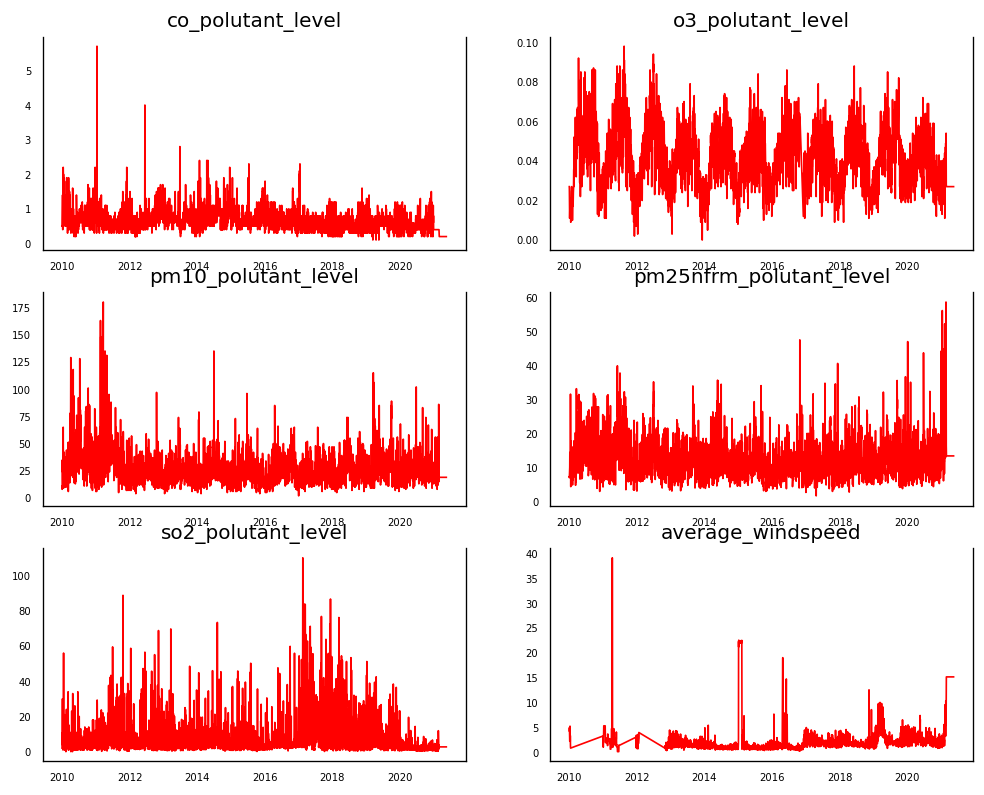

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    data = AJ_df[AJ_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(AJ_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

# plt.tight_layout();

In [41]:
# Training the Model

In [42]:
# Splitting dataset into training and test

In [43]:
split_time = 200

train = AJ_df.iloc[:len(AJ_df)-split_time]
test = AJ_df.iloc[len(AJ_df)-split_time:] 

In [44]:
model = VAR(train) # Training the VAR model

/Users/abhishekgawande/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [45]:
#testing for the best lag value

results_summary = model.select_order(20).summary()


In [46]:
results_summary

,AIC,BIC,FPE,HQIC
0,10.44,10.50,3.430e+04,10.46
1,-5.642,-3.743*,0.003547,-4.968
2,-6.639,-2.896,0.001309,-5.311*
3,-6.829*,-1.242,0.001083*,-4.847
4,-6.789,0.6421,0.001127,-4.153
5,-6.694,2.581,0.001240,-3.404
6,-6.639,4.481,0.001313,-2.694
7,-6.530,6.433,0.001466,-1.931
8,-6.385,8.423,0.001699,-1.132
9,-6.164,10.49,0.002127,-0.2561


In [47]:

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0

file = results_summary.as_html()
# df = pd.read_csv(file)
results_summary_df = pd.read_html(file, header=0, index_col=0)[0]

results_summary_df.dtypes


AIC     object
BIC     object
FPE     object
HQIC    object
dtype: object

In [48]:
# Getting optimum lag

aics = list(results_summary_df["AIC"].values)
aic_min = 5
for i in range(20):
    if '*' in aics[i]:
#         print(i)
        aic_min = i
        break
    
bics = list(results_summary_df["BIC"].values)
bic_min = 5
for i in range(20):
    if '*' in aics[i]:
#         print(i)
        bic_min = i
        break

        
fpes = list(results_summary_df["FPE"].values)
fpe_min = 5
for i in range(20):
    if '*' in fpes[i]:
#         print(i)
        fpe_min = i
        break
        
optimum_lag = min(10, aic_min,bic_min*3,fpe_min*3)
optimum_lag

3

In [49]:
#Fitting the model with the best lag value

results = model.fit(optimum_lag)


In [50]:
# print(results.summary())

In [51]:
lag = results.k_ar

In [52]:
#getting long-term forecasts using the model

In [53]:
forecasts = results.forecast(train.values[-lag:], steps = split_time)
forecasts

array([[4.03885406e-01, 3.46312050e-02, 2.14949869e+01, ...,
        9.45021768e+01, 3.96481169e+00, 7.45042710e+00],
       [5.63406219e-01, 3.65109774e-02, 2.39515353e+01, ...,
        9.14041537e+01, 2.78480944e+00, 5.89056453e+00],
       [6.42413181e-01, 3.93849938e-02, 2.49330339e+01, ...,
        9.01254493e+01, 2.75988085e+00, 5.93082148e+00],
       ...,
       [6.76539862e-01, 4.22686327e-02, 2.70934154e+01, ...,
        9.07459285e+01, 2.83107015e+00, 6.09207511e+00],
       [6.76539381e-01, 4.22687130e-02, 2.70934484e+01, ...,
        9.07459417e+01, 2.83106365e+00, 6.09206435e+00],
       [6.76538911e-01, 4.22687914e-02, 2.70934806e+01, ...,
        9.07459546e+01, 2.83105730e+00, 6.09205383e+00]])

In [54]:
forecasts_df = pd.DataFrame(forecasts, columns = list(test.columns))
forecasts_df



,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
0,0.403885,0.034631,21.494987,6.761496,5.961131,3.349820,5.582765,0.753705,5.231658,1.221905,...,0.028658,0.119996,0.033001,0.074603,56.924051,65.114146,79.821869,94.502177,3.964812,7.450427
1,0.563406,0.036511,23.951535,8.567093,7.429446,3.241387,5.438854,0.844046,7.161068,1.284505,...,0.033647,0.142477,0.036539,0.283418,55.083914,63.706467,76.184253,91.404154,2.784809,5.890565
2,0.642413,0.039385,24.933034,10.418454,8.201622,2.944027,4.966082,0.899010,8.827830,1.098654,...,0.036892,0.159551,0.039339,0.500656,57.291446,66.039516,74.375936,90.125449,2.759881,5.930821
3,0.642074,0.039984,25.237047,11.014740,8.262653,3.020837,5.199858,0.898437,9.562019,1.084806,...,0.037775,0.166501,0.040304,0.462872,58.097259,66.516372,75.428364,90.669359,2.876980,6.121937
4,0.648257,0.040184,24.650267,11.043784,8.013190,2.894699,4.970497,0.878352,9.769635,1.158628,...,0.038122,0.170765,0.040662,0.445191,57.631797,66.047066,75.909166,91.078834,2.816270,6.029043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.676541,0.042268,27.093347,12.660204,8.787932,2.144259,3.977722,0.738304,10.657025,2.392640,...,0.041947,0.189227,0.044449,0.745431,56.960583,65.451200,74.922478,90.745901,2.831084,6.092097
196,0.676540,0.042269,27.093382,12.660217,8.787928,2.144250,3.977712,0.738303,10.657040,2.392641,...,0.041947,0.189227,0.044449,0.745429,56.960718,65.451335,74.922497,90.745915,2.831077,6.092086
197,0.676540,0.042269,27.093415,12.660229,8.787924,2.144241,3.977702,0.738303,10.657055,2.392643,...,0.041947,0.189227,0.044449,0.745428,56.960850,65.451466,74.922516,90.745928,2.831070,6.092075
198,0.676539,0.042269,27.093448,12.660240,8.787921,2.144233,3.977692,0.738303,10.657069,2.392644,...,0.041947,0.189227,0.044449,0.745426,56.960978,65.451594,74.922534,90.745942,2.831064,6.092064


In [55]:
test

,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.2,0.031,17.0,9.4,0.4,3.352083,5.45,0.5,6.5,1.9,...,0.029,0.2,0.027,0.1,44.458334,49.5,85.500000,98.5,4.029167,7.55
2020-10-31,0.5,0.038,15.0,8.9,1.8,1.927083,3.55,0.7,6.2,2.0,...,0.031,0.2,0.034,0.0,47.208334,58.5,77.645834,93.0,2.300000,5.25
2020-11-01,0.4,0.037,20.0,7.7,0.9,3.214583,5.95,0.7,7.3,2.2,...,0.036,0.2,0.038,0.3,51.895833,59.0,65.354166,97.0,5.560417,10.85
2020-11-02,0.4,0.034,22.0,7.7,1.1,2.345833,4.75,0.5,6.1,2.0,...,0.035,0.1,0.036,0.4,35.979167,45.0,52.041667,78.5,2.864583,7.10
2020-11-03,1.0,0.034,54.0,20.0,3.5,0.970834,2.30,0.6,9.1,3.7,...,0.036,0.1,0.043,1.2,42.076389,55.5,51.312500,67.0,1.351389,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-14,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-15,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85


In [56]:
# getting plots of actual test data vs forecasts

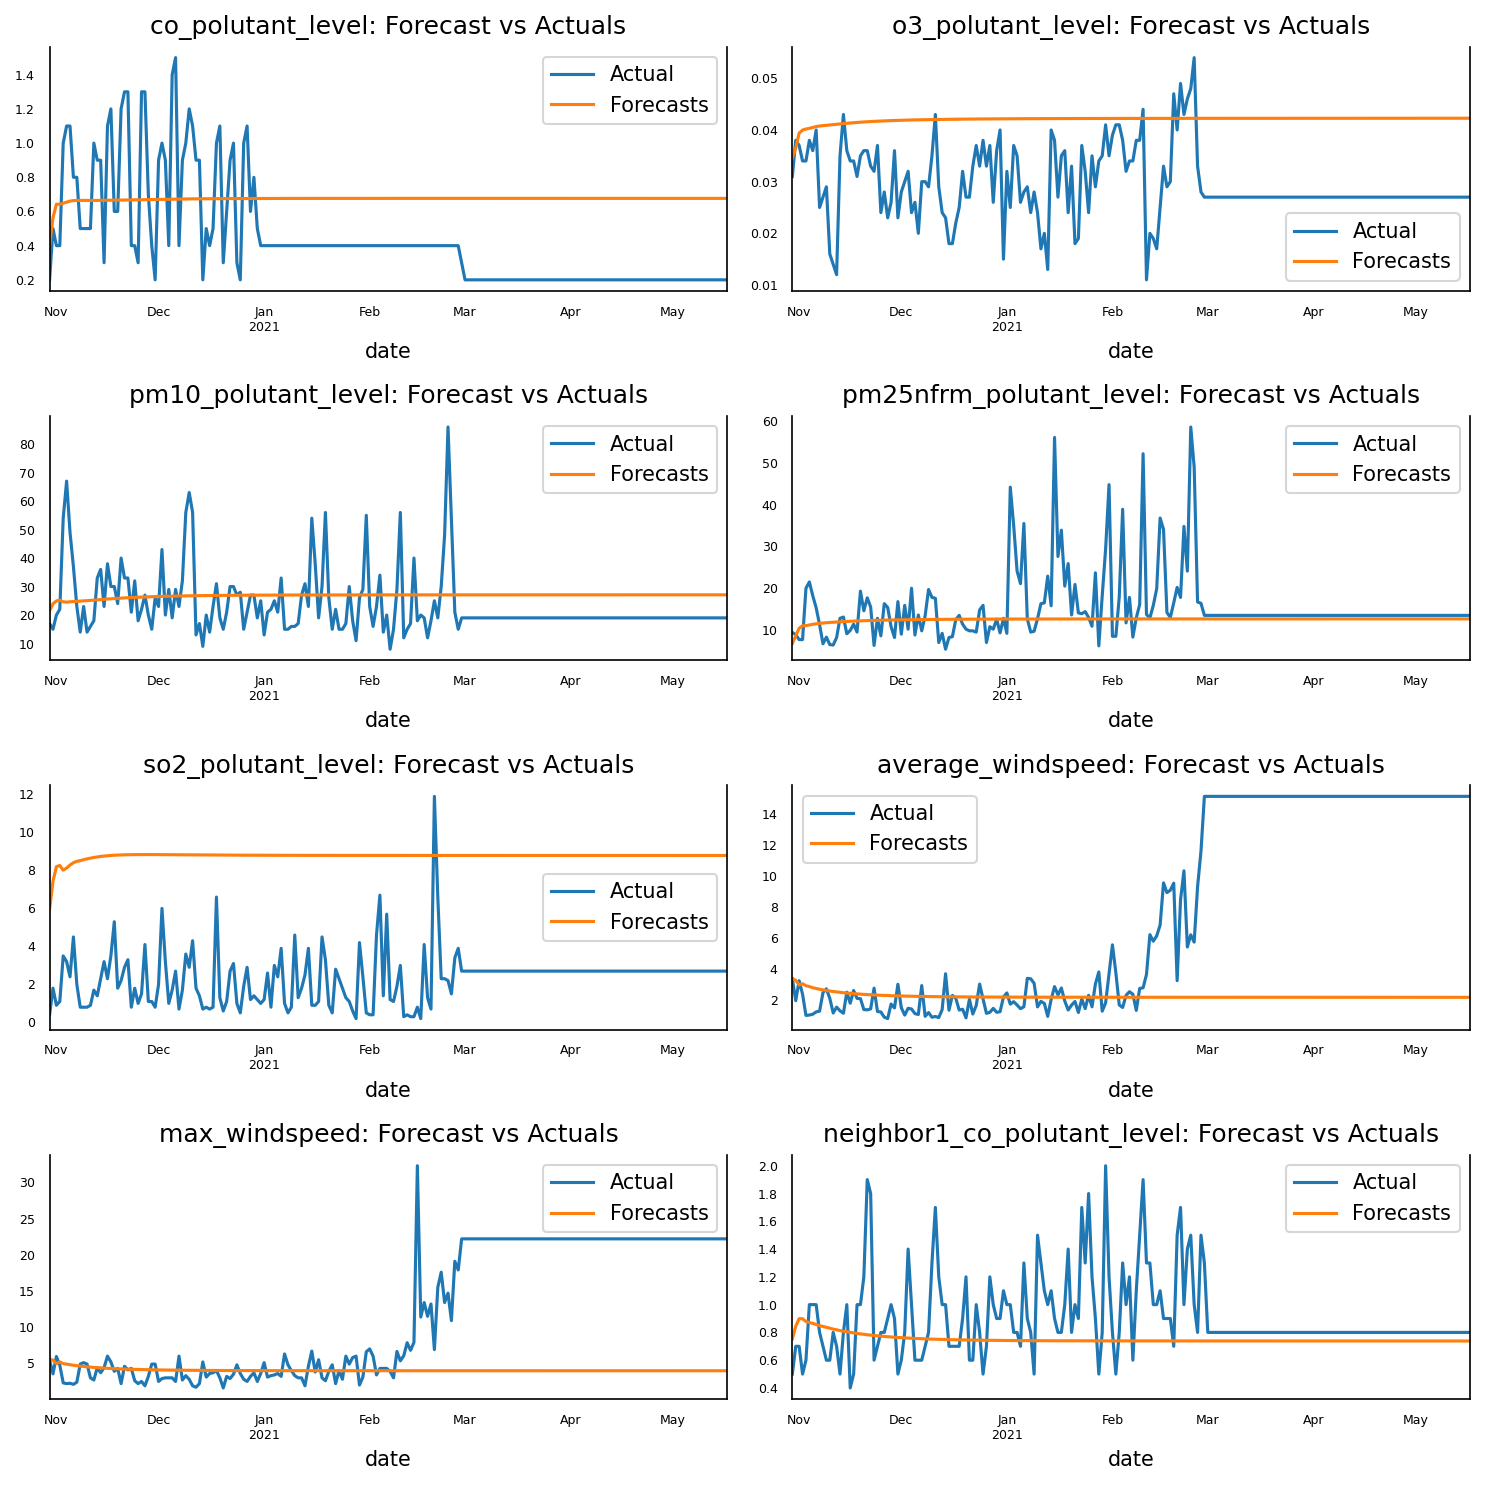

In [57]:

forecasts_df.index = test.index
# display(forecasts_df)
fig, axes = plt.subplots(nrows= 4, ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(forecasts_df.columns, axes.flatten())):
#     print(forecasts_df[col], test[col])
    test[col].plot(legend=True, ax=ax, label = "Actual");
    forecasts_df[col].plot(legend=True, ax=ax,label = "Forecasts")  
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


# As we can see.. forecasts tend to converge to a fix value after certain time periods. Long time forecasting is unreliable.


In [58]:
# fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,8))
# for i, ax in enumerate(axes.flatten()):
#     data = forecasts_df[forecasts_df.columns[i]]
#     ax.plot(data, color='blue', linewidth=1)
#     # Decorations
#     ax.set_title(forecasts_df.columns[i])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout();




In [59]:
forecasts_df

,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.403885,0.034631,21.494987,6.761496,5.961131,3.349820,5.582765,0.753705,5.231658,1.221905,...,0.028658,0.119996,0.033001,0.074603,56.924051,65.114146,79.821869,94.502177,3.964812,7.450427
2020-10-31,0.563406,0.036511,23.951535,8.567093,7.429446,3.241387,5.438854,0.844046,7.161068,1.284505,...,0.033647,0.142477,0.036539,0.283418,55.083914,63.706467,76.184253,91.404154,2.784809,5.890565
2020-11-01,0.642413,0.039385,24.933034,10.418454,8.201622,2.944027,4.966082,0.899010,8.827830,1.098654,...,0.036892,0.159551,0.039339,0.500656,57.291446,66.039516,74.375936,90.125449,2.759881,5.930821
2020-11-02,0.642074,0.039984,25.237047,11.014740,8.262653,3.020837,5.199858,0.898437,9.562019,1.084806,...,0.037775,0.166501,0.040304,0.462872,58.097259,66.516372,75.428364,90.669359,2.876980,6.121937
2020-11-03,0.648257,0.040184,24.650267,11.043784,8.013190,2.894699,4.970497,0.878352,9.769635,1.158628,...,0.038122,0.170765,0.040662,0.445191,57.631797,66.047066,75.909166,91.078834,2.816270,6.029043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.676541,0.042268,27.093347,12.660204,8.787932,2.144259,3.977722,0.738304,10.657025,2.392640,...,0.041947,0.189227,0.044449,0.745431,56.960583,65.451200,74.922478,90.745901,2.831084,6.092097
2021-05-14,0.676540,0.042269,27.093382,12.660217,8.787928,2.144250,3.977712,0.738303,10.657040,2.392641,...,0.041947,0.189227,0.044449,0.745429,56.960718,65.451335,74.922497,90.745915,2.831077,6.092086
2021-05-15,0.676540,0.042269,27.093415,12.660229,8.787924,2.144241,3.977702,0.738303,10.657055,2.392643,...,0.041947,0.189227,0.044449,0.745428,56.960850,65.451466,74.922516,90.745928,2.831070,6.092075


In [60]:
# creatinf functions to evaluate the models

In [61]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse},["mape", "me" , "mae" , "mpe" , "rmse"], [mape, me, mae, mpe, rmse])


def evaluation_metric(forcast_df, actual_df):
    evaluations_forcast_df = {}
    results_forcast_df = None
    
#     print("forecasts:", forcast_df)
    
#     print("test", actual_df)

    for i in range(min(8,len(forcast_df.columns))):
        results_forcast_df = forecast_accuracy(forcast_df[forcast_df.columns[i]].values, actual_df[actual_df.columns[i]].values)
        evaluations_forcast_df[forcast_df.columns[i]] = results_forcast_df[2]

    evaluations_df = pd.DataFrame.from_dict(evaluations_forcast_df, orient='index',
                       columns= results_forcast_df[1])

    return evaluations_df



In [62]:
evaluations_forecasts_test = evaluation_metric(forecasts_df, test)
evaluations_forecasts_test

,mape,me,mae,mpe,rmse
co_polutant_level,1.304041,0.238853,0.367282,1.188141,0.390093
o3_polutant_level,0.520077,0.012552,0.012947,0.511894,0.014306
pm10_polutant_level,0.426045,3.304617,9.170221,0.305733,11.644080
pm25nfrm_polutant_level,0.236554,-2.993764,4.462493,-0.052165,8.821736
so2_polutant_level,5.020681,6.403274,6.434382,5.018067,6.550366
average_windspeed,0.692188,-5.374129,6.003149,-0.162304,8.372413
max_windspeed,0.572972,-7.797006,8.587512,-0.254460,11.950108
neighbor1_co_polutant_level,0.206957,-0.151443,0.211376,-0.098273,0.324716


In [63]:
# Checking how VAR estimates the training data


In [64]:
# Checking how VAR estimates the training data

estimations = np.empty(train.iloc[:len(train)-lag].shape)

for i in range(len(train)-lag):
    estimate = results.forecast(train.values[i:i+lag], steps = 1)
#     if i < 5:
#         print(estimate)
    estimations[i] = estimate
 


In [65]:
estimations_df = pd.DataFrame(estimations, columns = list(train.columns))
train_lag = train.iloc[lag:]

estimations_df.index = train_lag.index
# display(estimations_df)
# display(train_lag)


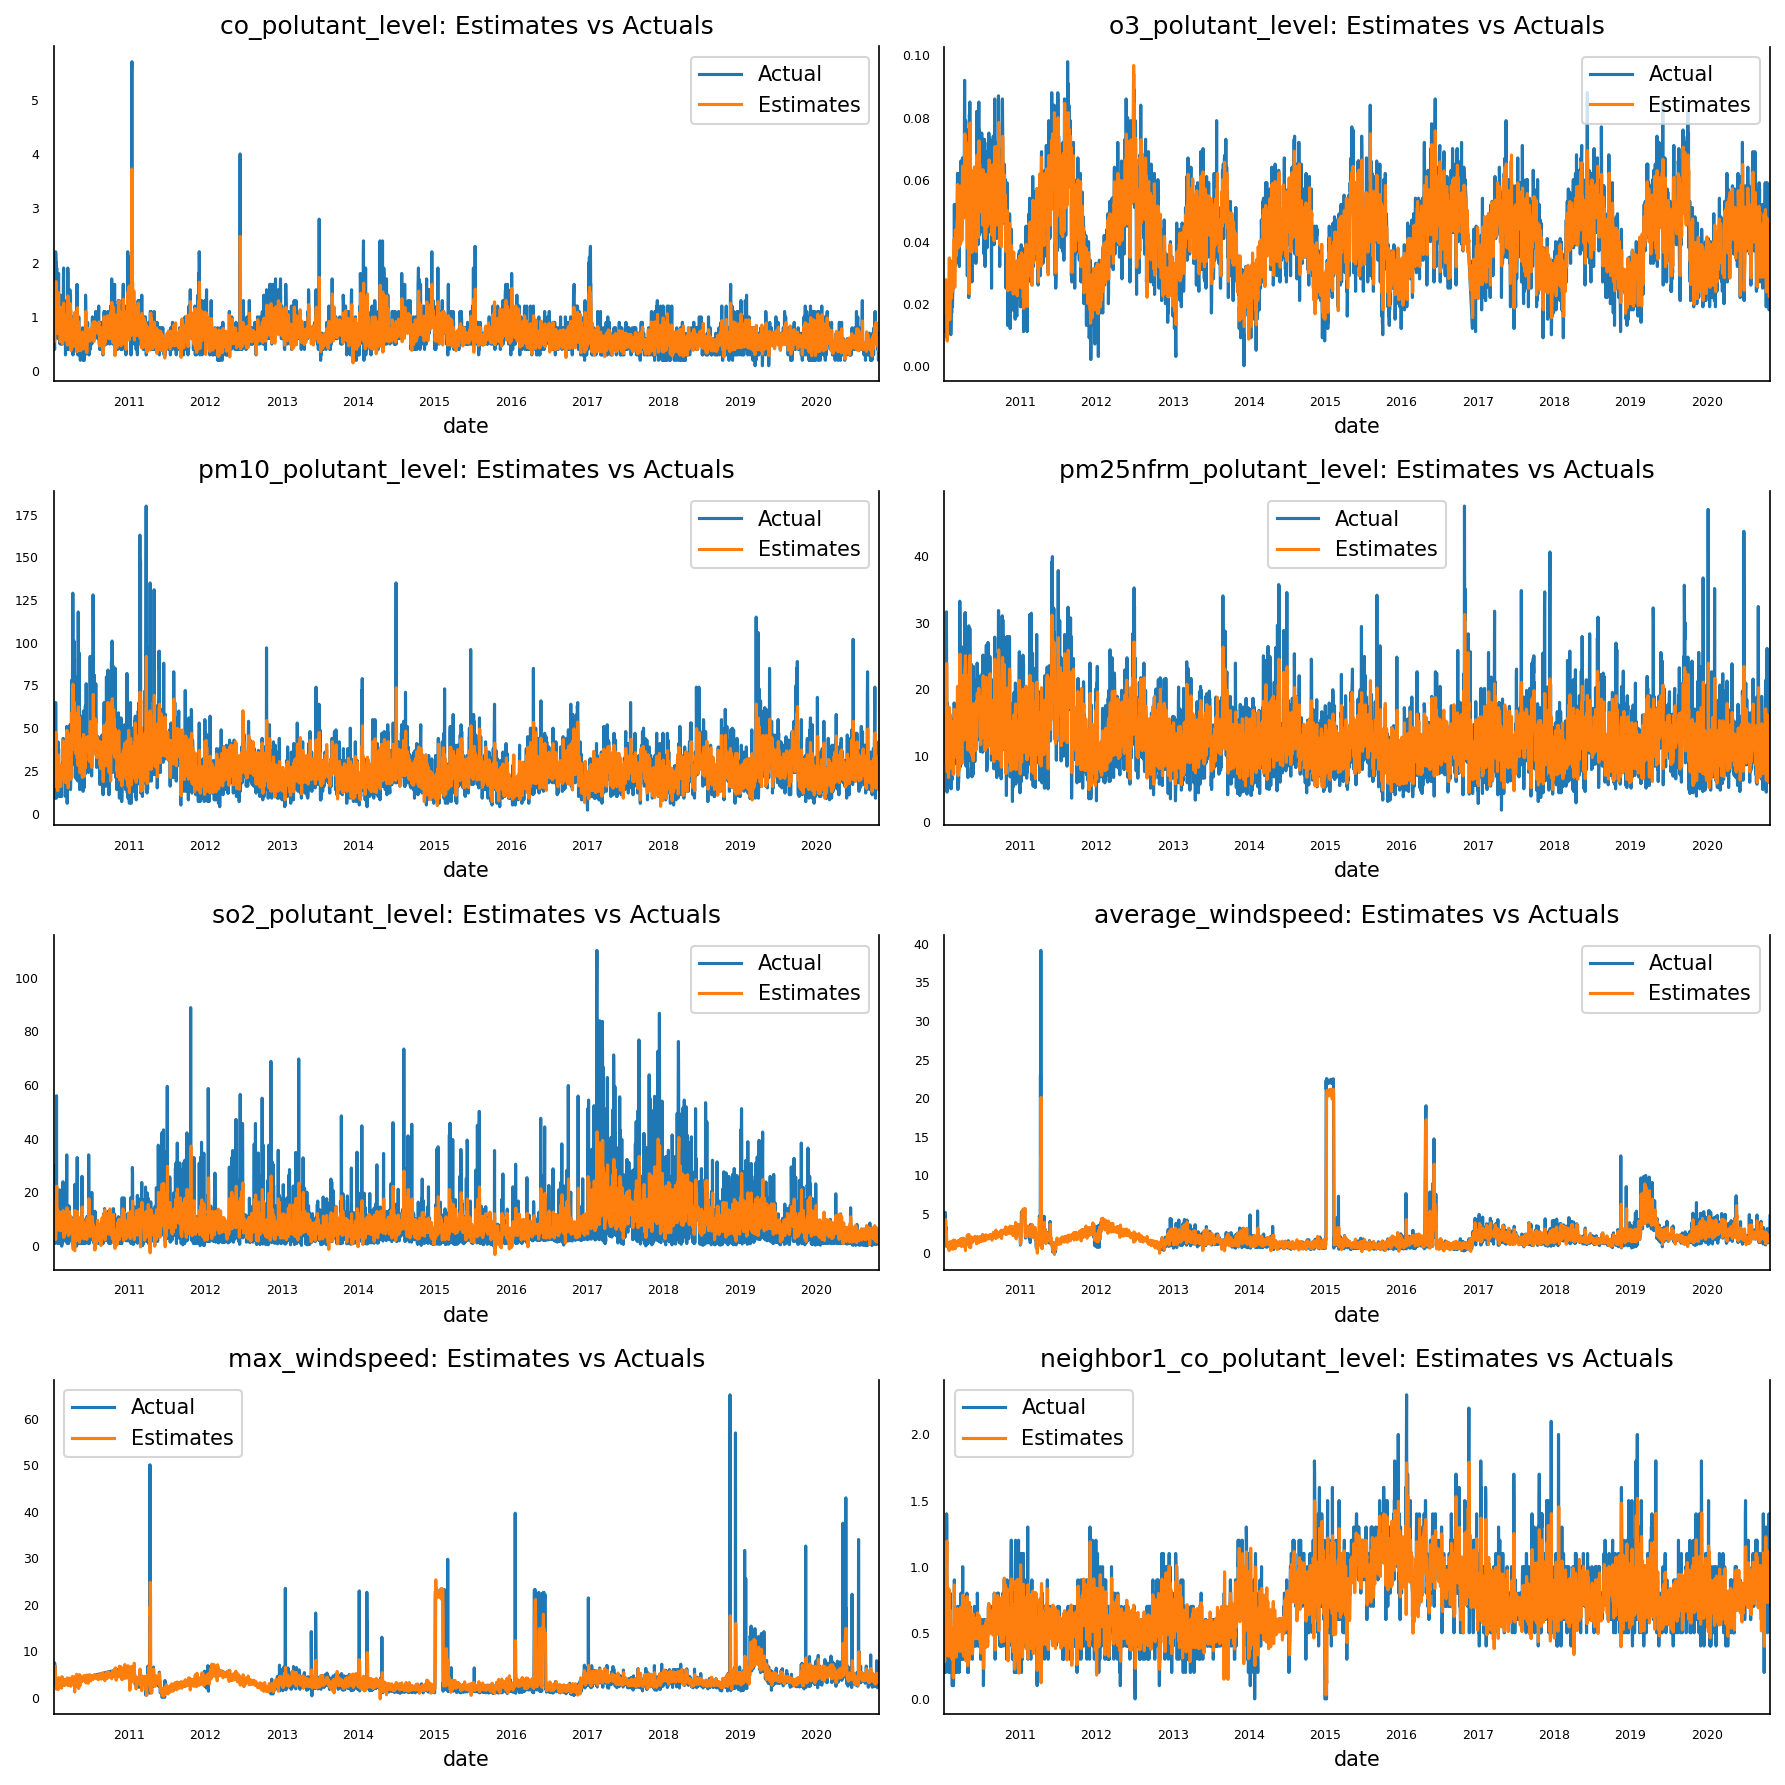

In [66]:
   
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=150, figsize=(12,12))
for i, (col,ax) in enumerate(zip(estimations_df.columns, axes.flatten())):
#     print(forecasts_df[col], test[col])
    train_lag[col].plot(legend=True, ax=ax, label = "Actual");
    estimations_df[col].plot(legend=True, ax=ax, label = "Estimates")
    
    ax.set_title(col + ": Estimates vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [67]:

evaluations_estimates_train = evaluation_metric(estimations_df, train_lag)
evaluations_estimates_train

<ipython-input-61-4088d63d5c07>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
<ipython-input-61-4088d63d5c07>:5: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


,mape,me,mae,mpe,rmse
co_polutant_level,0.286004,-9.979080e-13,0.169765,0.115792,0.252454
o3_polutant_level,inf,-5.781486e-15,0.006483,inf,0.008325
pm10_polutant_level,0.356265,-4.004397e-12,8.024539,0.164155,11.740846
pm25nfrm_polutant_level,0.269358,-9.627998e-13,2.971227,0.102678,4.076509
so2_polutant_level,inf,1.174553e-13,6.151994,inf,9.467260
average_windspeed,0.332755,3.136767e-13,0.542992,0.154344,1.174651
max_windspeed,0.368562,5.903222e-13,1.137395,0.221198,2.894773
neighbor1_co_polutant_level,inf,-4.120141e-14,0.124719,inf,0.169297


In [68]:
# Checking how VAR predicts the test data(one day at a time)


In [69]:

predictors = AJ_df.iloc[-split_time-lag:]

predictions = np.empty(test.shape)
for i in range(test.shape[0]):
    prediction = results.forecast(predictors.values[i:i+lag], steps = 1)
    predictions[i] = prediction
    
# forecasts_df
display(predictors)
# print(predictors.values[0:lag])

,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,0.3,0.022,25.0,10.5,1.8,1.737500,3.05,1.1,11.9,1.8,...,0.012,0.2,0.027,0.1,62.833334,71.5,87.479167,99.0,1.674185,4.95
2020-10-28,0.3,0.021,18.0,7.2,1.1,2.060417,5.60,1.2,8.7,1.8,...,0.003,0.2,0.023,0.1,64.812500,67.0,95.000000,99.0,2.250000,3.95
2020-10-29,0.3,0.032,24.0,7.1,1.1,4.768750,7.55,0.9,3.8,3.6,...,0.024,0.1,0.031,0.1,64.979167,75.0,84.645834,98.0,4.650000,9.25
2020-10-30,0.2,0.031,17.0,9.4,0.4,3.352083,5.45,0.5,6.5,1.9,...,0.029,0.2,0.027,0.1,44.458334,49.5,85.500000,98.5,4.029167,7.55
2020-10-31,0.5,0.038,15.0,8.9,1.8,1.927083,3.55,0.7,6.2,2.0,...,0.031,0.2,0.034,0.0,47.208334,58.5,77.645834,93.0,2.300000,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-14,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-15,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85


In [70]:
predictions_df = pd.DataFrame(predictions, columns = list(test.columns))
predictions_df.index = test.index
display(predictions_df)
display(test)

,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.403885,0.034631,21.494987,6.761496,5.961131,3.349820,5.582765,0.753705,5.231658,1.221905,...,0.028658,0.119996,0.033001,0.074603,56.924051,65.114146,79.821869,94.502177,3.964812,7.450427
2020-10-31,0.538680,0.035514,22.713215,10.206269,7.118926,2.810438,4.791547,0.760892,8.070836,1.307351,...,0.034076,0.179287,0.035597,0.531002,44.065785,53.249994,72.581970,88.946329,1.981745,4.649281
2020-11-01,0.669194,0.039446,23.535932,11.396101,4.241849,2.221686,4.154809,0.880647,9.444914,1.550122,...,0.036242,0.201092,0.038395,0.364914,54.068178,63.239963,72.308423,88.872931,2.452812,5.585509
2020-11-02,0.403719,0.037173,17.581960,7.304879,5.497465,2.785824,4.919564,0.550600,5.530217,1.304437,...,0.035942,0.174571,0.037472,0.207967,45.172148,53.314145,73.562304,91.732518,4.556079,8.862729
2020-11-03,0.633854,0.036842,27.292252,10.866257,5.629983,2.459045,4.121034,0.794244,9.691250,1.843014,...,0.035964,0.124203,0.042890,0.579454,41.841494,52.610860,49.481408,74.858053,2.347621,5.788533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.403823,0.026619,16.094420,9.701487,9.137331,13.715813,18.330400,0.829028,12.762099,1.260396,...,0.027219,0.140788,0.028539,-0.026469,58.323078,66.212119,80.304607,96.053534,3.894809,8.396919
2021-05-14,0.403823,0.026619,16.094420,9.701487,9.137331,13.715813,18.330400,0.829028,12.762099,1.260396,...,0.027219,0.140788,0.028539,-0.026469,58.323078,66.212119,80.304607,96.053534,3.894809,8.396919
2021-05-15,0.403823,0.026619,16.094420,9.701487,9.137331,13.715813,18.330400,0.829028,12.762099,1.260396,...,0.027219,0.140788,0.028539,-0.026469,58.323078,66.212119,80.304607,96.053534,3.894809,8.396919


,co_polutant_level,o3_polutant_level,pm10_polutant_level,pm25nfrm_polutant_level,so2_polutant_level,average_windspeed,max_windspeed,neighbor1_co_polutant_level,neighbor1_pm25nfrm_polutant_level,neighbor1_so2_polutant_level,...,neighbor4_o3_polutant_level,neighbor5_co_polutant_level,neighbor5_o3_polutant_level,neighbor5_so2_polutant_level,neighbor5_average_temp,neighbor5_max_temp,neighbor5_average_rh,neighbor5_max_rh,neighbor5_average_windspeed,neighbor5_max_windspeed
date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,0.2,0.031,17.0,9.4,0.4,3.352083,5.45,0.5,6.5,1.9,...,0.029,0.2,0.027,0.1,44.458334,49.5,85.500000,98.5,4.029167,7.55
2020-10-31,0.5,0.038,15.0,8.9,1.8,1.927083,3.55,0.7,6.2,2.0,...,0.031,0.2,0.034,0.0,47.208334,58.5,77.645834,93.0,2.300000,5.25
2020-11-01,0.4,0.037,20.0,7.7,0.9,3.214583,5.95,0.7,7.3,2.2,...,0.036,0.2,0.038,0.3,51.895833,59.0,65.354166,97.0,5.560417,10.85
2020-11-02,0.4,0.034,22.0,7.7,1.1,2.345833,4.75,0.5,6.1,2.0,...,0.035,0.1,0.036,0.4,35.979167,45.0,52.041667,78.5,2.864583,7.10
2020-11-03,1.0,0.034,54.0,20.0,3.5,0.970834,2.30,0.6,9.1,3.7,...,0.036,0.1,0.043,1.2,42.076389,55.5,51.312500,67.0,1.351389,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-14,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85
2021-05-15,0.2,0.027,19.0,13.5,2.7,15.150000,22.20,0.8,22.1,1.0,...,0.022,0.1,0.027,0.0,64.979166,70.0,67.666667,95.0,4.000000,7.85


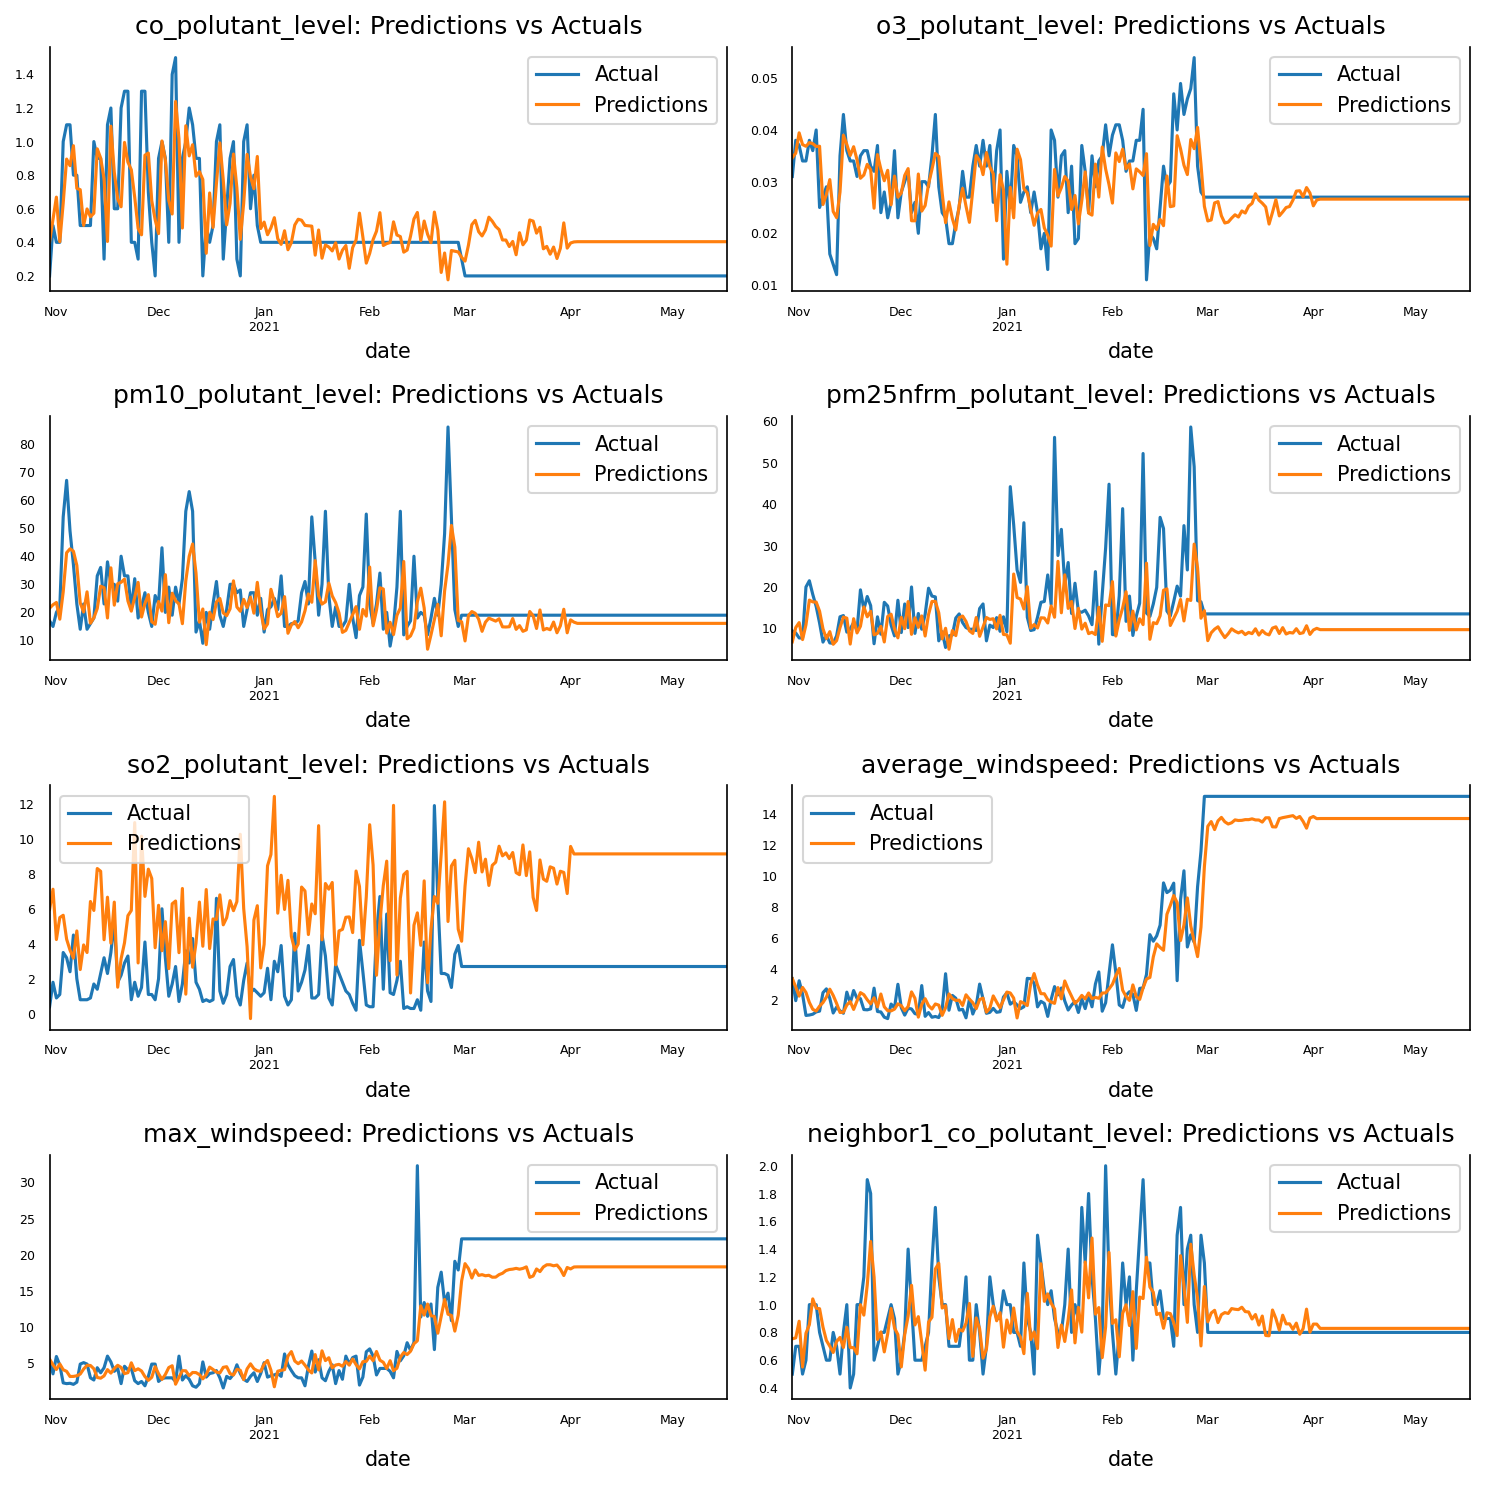

In [71]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(predictions_df.columns, axes.flatten())):
#     print(forecasts_df[col], test[col])
    test[col].plot(legend=True, ax=ax, label = "Actual");
    predictions_df[col].plot(legend=True, ax=ax, label = "Predictions")
    
    ax.set_title(col + ": Predictions vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


In [72]:

evaluations_predictions_test = evaluation_metric(predictions_df, test)
evaluations_predictions_test

# print(evaluations_predictions_test_df.equals(evaluations_predictions_test))

,mape,me,mae,mpe,rmse
co_polutant_level,0.617789,0.080720,0.185211,0.495456,0.232434
o3_polutant_level,0.141412,-0.001255,0.003846,-0.005003,0.005918
pm10_polutant_level,0.279536,-2.991500,6.684170,-0.047879,9.958116
pm25nfrm_polutant_level,0.329869,-4.102423,5.629777,-0.165384,8.753097
so2_polutant_level,3.554738,4.613737,4.827767,3.506453,5.329664
average_windspeed,0.280957,-0.617068,1.134616,0.079247,1.416943
max_windspeed,0.302744,-1.613190,2.634245,0.051508,3.489902
neighbor1_co_polutant_level,0.166697,-0.018414,0.156020,0.034543,0.248252


In [73]:
# fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,8))
# for i, ax in enumerate(axes.flatten()):
#     data = predictions_df[predictions_df.columns[i]]
# #     print(data)
#     ax.plot(data, color='blue', linewidth=1)
#     # Decorations
#     ax.set_title(predictions_df.columns[i])
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

# plt.tight_layout();

<AxesSubplot:xlabel='date'>

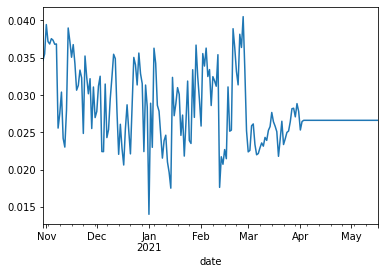

In [74]:
predictions_df['o3_polutant_level'].plot()


<AxesSubplot:xlabel='date'>

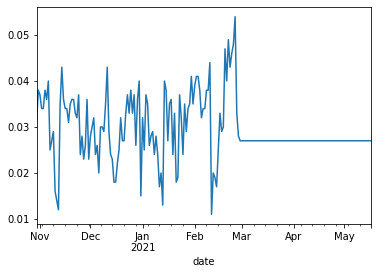

In [75]:
test['o3_polutant_level'].plot()

In [78]:
# Coefficients and the corrosponding p-values can be retrieved using this
df_coeff= pd.DataFrame([results.params['o3_polutant_level'],results.pvalues['o3_polutant_level']]).T

In [79]:
df_coeff

,o3_polutant_level,o3_polutant_level
const,-0.006563,3.167336e-01
L1.co_polutant_level,0.001185,3.543423e-02
L1.o3_polutant_level,0.422554,4.605501e-87
L1.pm10_polutant_level,0.000039,5.281034e-03
L1.pm25nfrm_polutant_level,-0.000060,1.528515e-01
...,...,...
L3.neighbor5_max_temp,-0.000079,1.983196e-01
L3.neighbor5_average_rh,-0.000026,3.597507e-01
L3.neighbor5_max_rh,0.000001,9.720713e-01
L3.neighbor5_average_windspeed,-0.000414,9.389757e-02
